#Library

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint






In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d alistairking/recyclable-and-household-waste-classification -p data
!unzip ./data/recyclable-and-household-waste-classification.zip -d ./data


Streaming output truncated to the last 5000 lines.
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_1.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_10.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_100.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_101.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_102.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_103.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_104.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_105.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_106.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_107.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_108.png  
  inflating: ./data/images/images/plastic_shopping_bags/default/Image_10

In [ ]:
import os

# Path ke folder dataset yang telah diekstrak
extracted_path = "/content/data/images/images"

# Menampilkan isi folder utama
for folder in os.listdir(extracted_path):
    print(folder)



plastic_cup_lids
plastic_shopping_bags
aluminum_food_cans
styrofoam_cups
newspaper
eggshells
glass_beverage_bottles
plastic_soda_bottles
glass_food_jars
aluminum_soda_cans
disposable_plastic_cutlery
paper_cups
plastic_detergent_bottles
plastic_food_containers
shoes
office_paper
steel_food_cans
plastic_trash_bags
clothing
cardboard_packaging
aerosol_cans
cardboard_boxes
food_waste
styrofoam_food_containers
plastic_water_bottles
magazines
plastic_straws
tea_bags
coffee_grounds
glass_cosmetic_containers


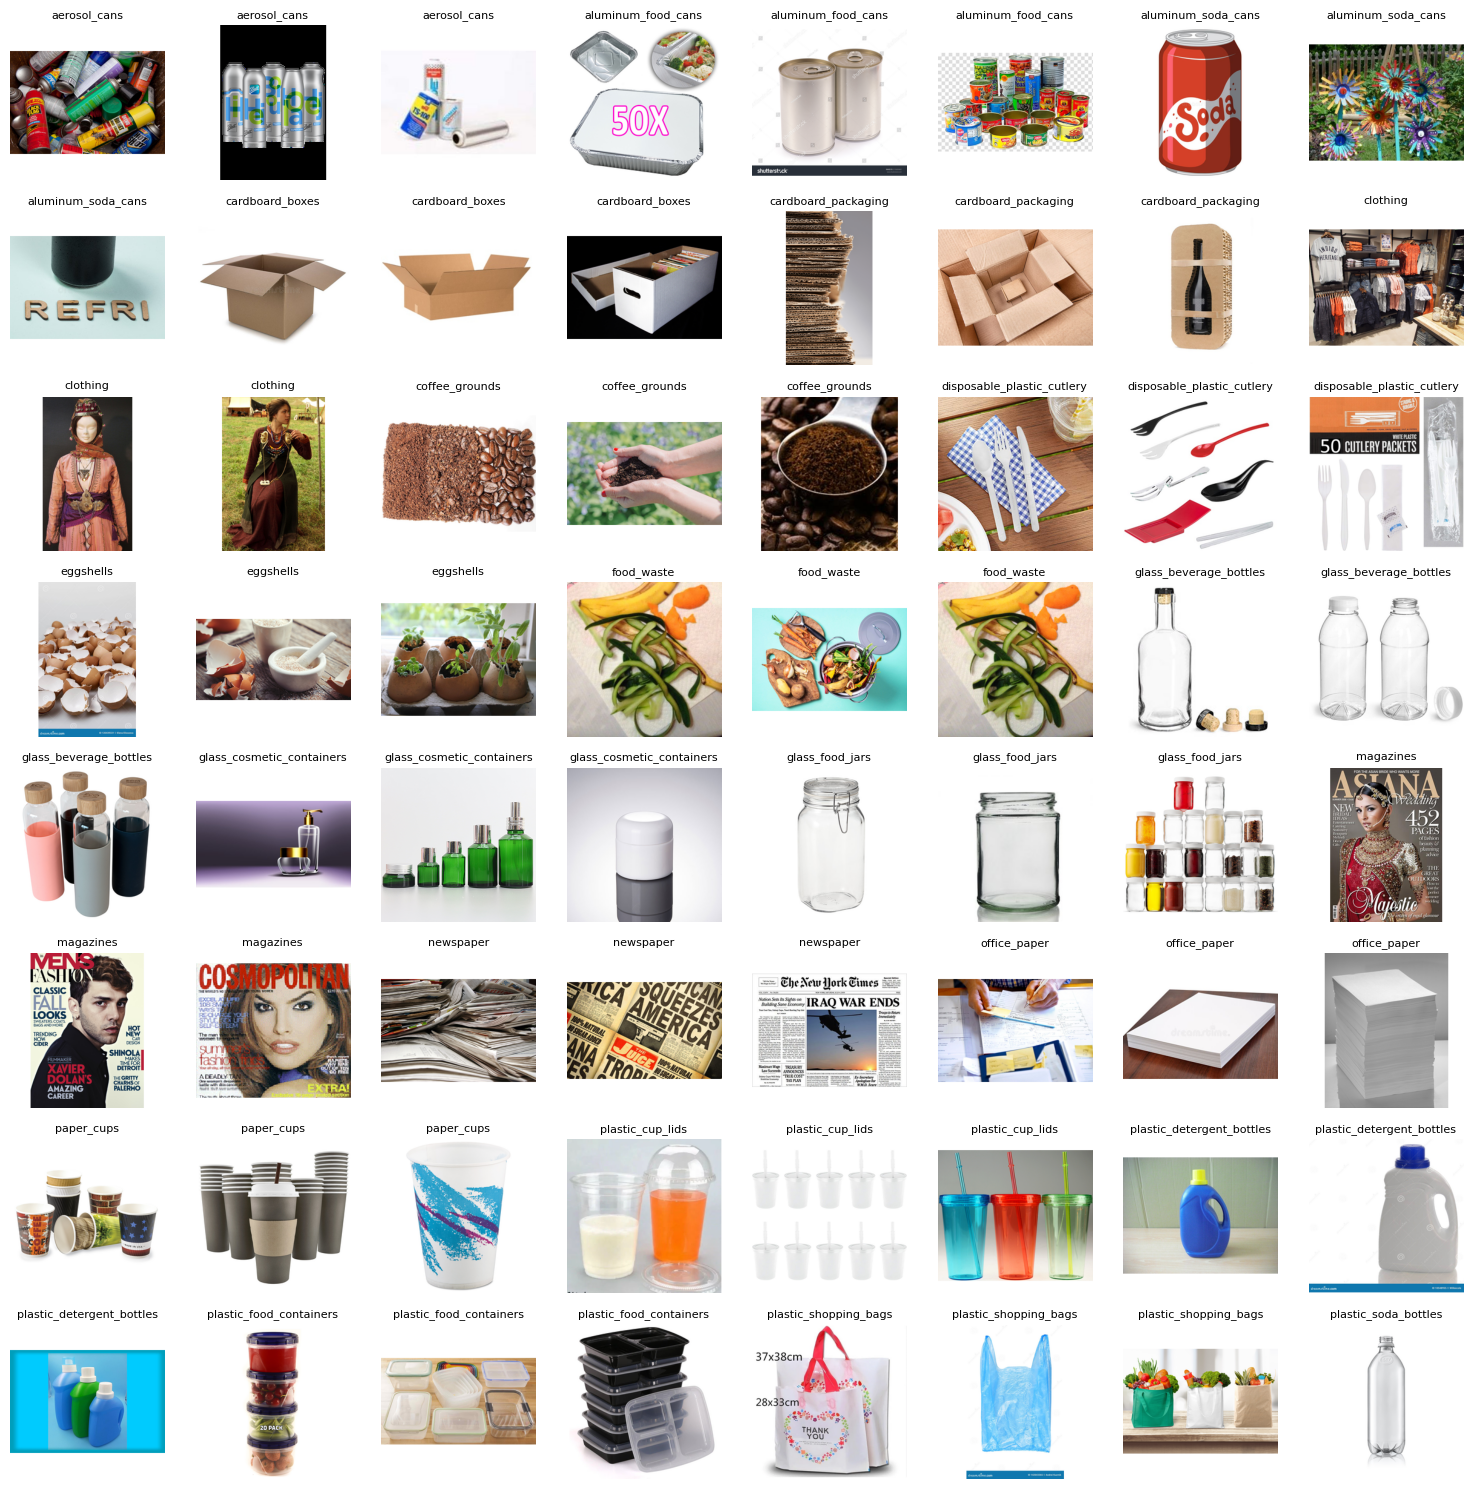

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path ke folder dataset
base_path = '/content/data/images/images'

# Mendapatkan daftar kategori
categories = sorted(os.listdir(base_path))  # Folder kategori utama

# Menampilkan 3 gambar pertama dari setiap kategori (dari folder default atau real_world)
plt.figure(figsize=(15, 15))

image_count = 0  # Counter untuk menampilkan total gambar

for category in categories:
    category_path = os.path.join(base_path, category)
    image_files = []  # List untuk menyimpan path gambar

    # Masuk ke folder 'default' dan 'real_world'
    for subfolder in ['default', 'real_world']:
        subfolder_path = os.path.join(category_path, subfolder)
        if os.path.isdir(subfolder_path):  # Cek jika subfolder valid
            image_files.extend([
                os.path.join(subfolder_path, img)
                for img in os.listdir(subfolder_path)
                if img.endswith(('jpg', 'jpeg', 'png'))  # Ambil file gambar saja
            ])

    # Ambil maksimal 3 gambar untuk ditampilkan
    for img_path in image_files[:3]:
        try:
            img = mpimg.imread(img_path)
            plt.subplot(8, 8, image_count + 1)  # Membatasi grid 8x8
            plt.imshow(img)
            plt.title(category, fontsize=8)
            plt.axis('off')
            image_count += 1

            if image_count == 64:  # Maksimal 64 gambar
                break
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")

    if image_count == 64:  # Hentikan jika sudah menampilkan 64 gambar
        break

plt.tight_layout()
plt.show()


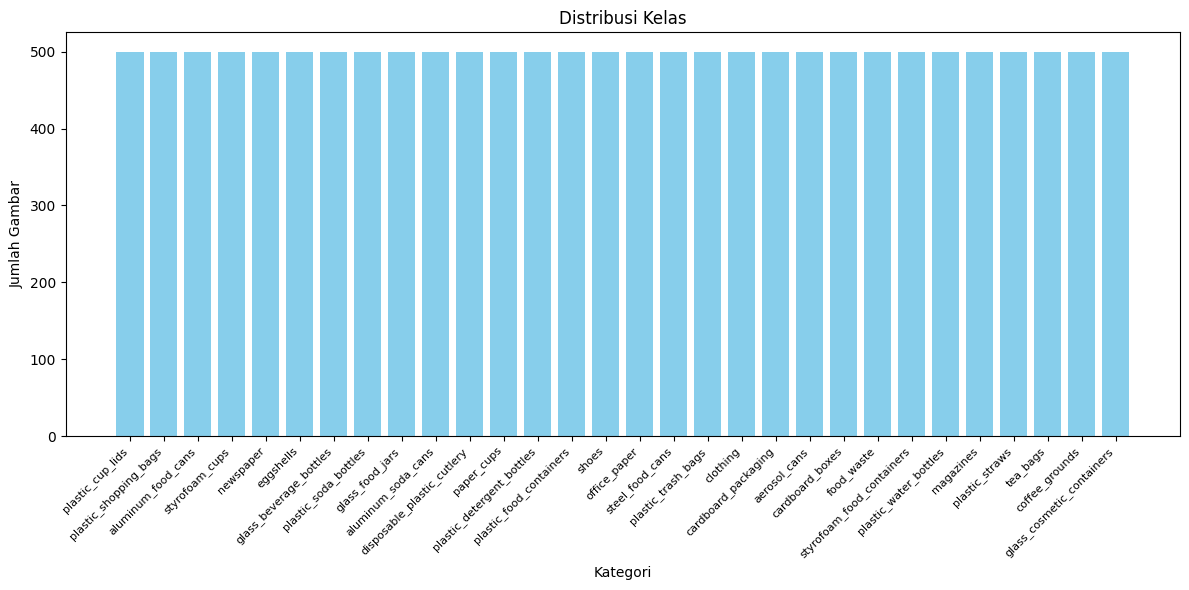

In [ ]:
import matplotlib.pyplot as plt
import os

# Base path dataset
base_path = '/content/data/images/images'

categories = []
counts = []

# Menghitung jumlah gambar di setiap kategori
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    if os.path.isdir(folder_path):
        categories.append(folder)  # Tambahkan nama kategori
        # Hitung jumlah gambar dalam subfolder 'default' dan 'real_world'
        count = 0
        for subfolder in ['default', 'real_world']:
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                count += len([img for img in os.listdir(subfolder_path) if img.endswith(('jpg', 'jpeg', 'png'))])
        counts.append(count)

# Visualisasi distribusi kelas
plt.figure(figsize=(12, 6))  # Perbesar ukuran grafik
plt.bar(categories, counts, color='skyblue')
plt.title("Distribusi Kelas")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Gambar")
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotasi label agar tidak bertumpuk
plt.tight_layout()  # Mengatur layout agar tidak terpotong
plt.show()


In [ ]:
import os

# Path ke folder dataset
dataset_path = "/content/data/images/images"  # Ganti sesuai dengan path dataset Anda

# Fungsi untuk menghitung jumlah gambar di seluruh kategori dan subfolder
def count_total_images(dataset_path):
    total_images = 0
    for category in os.listdir(dataset_path):
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            for subfolder in ['default', 'real_world']:
                subfolder_path = os.path.join(category_path, subfolder)
                if os.path.isdir(subfolder_path):
                    # Hitung file gambar di setiap subfolder
                    total_images += len([
                        f for f in os.listdir(subfolder_path)
                        if f.endswith(('jpg', 'jpeg', 'png'))
                    ])
    return total_images

# Hitung jumlah total gambar
total_images = count_total_images(dataset_path)
print(f"Total jumlah gambar di seluruh dataset: {total_images} images")


Total jumlah gambar di seluruh dataset: 15000 images


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Path ke folder dataset yang telah diekstrak
extracted_path = "/content/data/images/images"
output_path = "./data/split_dataset"

# Proporsi split
train_split = 0.7
val_split = 0.15
test_split = 0.15

# Membuat folder output
os.makedirs(output_path, exist_ok=True)
os.makedirs(os.path.join(output_path, "train"), exist_ok=True)
os.makedirs(os.path.join(output_path, "val"), exist_ok=True)
os.makedirs(os.path.join(output_path, "test"), exist_ok=True)

# Membagi dataset
for category in os.listdir(extracted_path):
    category_path = os.path.join(extracted_path, category)

    if os.path.isdir(category_path):
        all_images = []  # List semua gambar dari subfolder

        # Kumpulkan semua gambar dari `default` dan `real_world`
        for subfolder in ['default', 'real_world']:
            subfolder_path = os.path.join(category_path, subfolder)
            if os.path.isdir(subfolder_path):
                images = [
                    os.path.join(subfolder, img)
                    for img in os.listdir(subfolder_path)
                    if img.endswith(('jpg', 'jpeg', 'png'))
                ]
                all_images.extend(images)

        # Membagi dataset menjadi train, val, dan test
        train_imgs, temp_imgs = train_test_split(all_images, test_size=(1 - train_split), random_state=42)
        val_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_split / (val_split + test_split)), random_state=42)

        # Membuat folder kategori untuk setiap subset
        for subset, images in zip(["train", "val", "test"], [train_imgs, val_imgs, test_imgs]):
            subset_category_path = os.path.join(output_path, subset, category)
            os.makedirs(subset_category_path, exist_ok=True)

            # Memindahkan file gambar ke folder masing-masing
            for img_name in images:
                src = os.path.join(category_path, img_name)  # Path asli
                dst = os.path.join(subset_category_path, os.path.basename(img_name))  # Path tujuan
                shutil.copy(src, dst)

print("Dataset berhasil dibagi menjadi train, val, dan test.")


Dataset berhasil dibagi menjadi train, val, dan test.


In [ ]:
for subset in ["train", "val", "test"]:
    subset_path = os.path.join(output_path, subset)
    print(f"{subset.upper()}:")
    for category in os.listdir(subset_path):
        category_path = os.path.join(subset_path, category)
        print(f"  {category}: {len(os.listdir(category_path))} images")


TRAIN:
  plastic_cup_lids: 227 images
  plastic_shopping_bags: 227 images
  aluminum_food_cans: 227 images
  styrofoam_cups: 227 images
  newspaper: 227 images
  eggshells: 227 images
  glass_beverage_bottles: 227 images
  plastic_soda_bottles: 227 images
  glass_food_jars: 227 images
  aluminum_soda_cans: 227 images
  disposable_plastic_cutlery: 227 images
  paper_cups: 227 images
  plastic_detergent_bottles: 227 images
  plastic_food_containers: 227 images
  shoes: 227 images
  office_paper: 227 images
  steel_food_cans: 227 images
  plastic_trash_bags: 227 images
  clothing: 227 images
  cardboard_packaging: 227 images
  aerosol_cans: 227 images
  cardboard_boxes: 227 images
  food_waste: 227 images
  styrofoam_food_containers: 227 images
  plastic_water_bottles: 227 images
  magazines: 227 images
  plastic_straws: 227 images
  tea_bags: 227 images
  coffee_grounds: 227 images
  glass_cosmetic_containers: 227 images
VAL:
  plastic_cup_lids: 69 images
  plastic_shopping_bags: 69 imag

#Mobile net


In [ ]:
# Path dataset yang telah di-split
base_dir = "./data/split_dataset"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

print("Train Path:", train_dir)
print("Validation Path:", val_dir)
print("Test Path:", test_dir)


Train Path: ./data/split_dataset/train
Validation Path: ./data/split_dataset/val
Test Path: ./data/split_dataset/test


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation untuk training
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data preprocessing untuk validation dan testing
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Data Generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 6810 images belonging to 30 classes.
Found 2070 images belonging to 30 classes.
Found 2130 images belonging to 30 classes.


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, Sequential
from tensorflow.keras.models import Model

# Load MobileNet tanpa top layer (pre-trained pada ImageNet)
mobilenet_base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze semua layer pada MobileNet untuk transfer learning
for layer in mobilenet_base_model.layers:
    layer.trainable = False

# Jumlah kelas pada dataset
num_classes = 30

model = Sequential([
    mobilenet_base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,374,878 (12.87 MB)

 Trainable params: 143,710 (561.37 KB)

 Non-trainable params: 3,231,168 (12.33 MB)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    verbose=1
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


213/213 ━━━━━━━━━━━━━━━━━━━━ 121s 507ms/step - accuracy: 0.2662 - loss: 2.7673 - val_accuracy: 0.6425 - val_loss: 1.1881
Epoch 2/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 124s 461ms/step - accuracy: 0.6025 - loss: 1.3311 - val_accuracy: 0.7101 - val_loss: 0.9184
Epoch 3/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 96s 439ms/step - accuracy: 0.6795 - loss: 1.0609 - val_accuracy: 0.7193 - val_loss: 0.8355
Epoch 4/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 142s 443ms/step - accuracy: 0.6995 - loss: 0.9537 - val_accuracy: 0.7507 - val_loss: 0.7686
Epoch 5/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 139s 429ms/step - accuracy: 0.7347 - loss: 0.8427 - val_accuracy: 0.7638 - val_loss: 0.7328
Epoch 6/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 146s 445ms/step - accuracy: 0.7341 - loss: 0.8213 - val_accuracy: 0.7676 - val_loss: 0.7243
Epoch 7/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 137s 429ms/step - accuracy: 0.7608 - loss: 0.7534 - val_accuracy: 0.7720 - val_loss: 0.7092
Epoch 8/30
213/213 ━━━━━━━━━━━━━━━━━━━━ 95s 434ms/step - accuracy: 0.7661 - loss: 0.7314

In [ ]:
# Evaluasi di dataset test
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.7804 - loss: 0.5936
Test Accuracy: 81.13%


In [ ]:
# Prediksi pada dataset test
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Klasifikasi report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


67/67 ━━━━━━━━━━━━━━━━━━━━ 12s 151ms/step
Classification Report:
                            precision    recall  f1-score   support

              aerosol_cans       0.77      0.92      0.84        71
        aluminum_food_cans       0.59      0.42      0.49        71
        aluminum_soda_cans       0.83      0.85      0.84        71
           cardboard_boxes       0.55      0.51      0.53        71
       cardboard_packaging       0.50      0.54      0.52        71
                  clothing       0.87      0.87      0.87        71
            coffee_grounds       0.91      0.94      0.92        71
disposable_plastic_cutlery       0.96      0.93      0.94        71
                 eggshells       0.93      0.93      0.93        71
                food_waste       0.94      0.96      0.95        71
    glass_beverage_bottles       0.79      0.77      0.78        71
 glass_cosmetic_containers       0.86      0.87      0.87        71
           glass_food_jars       0.89      0.82   

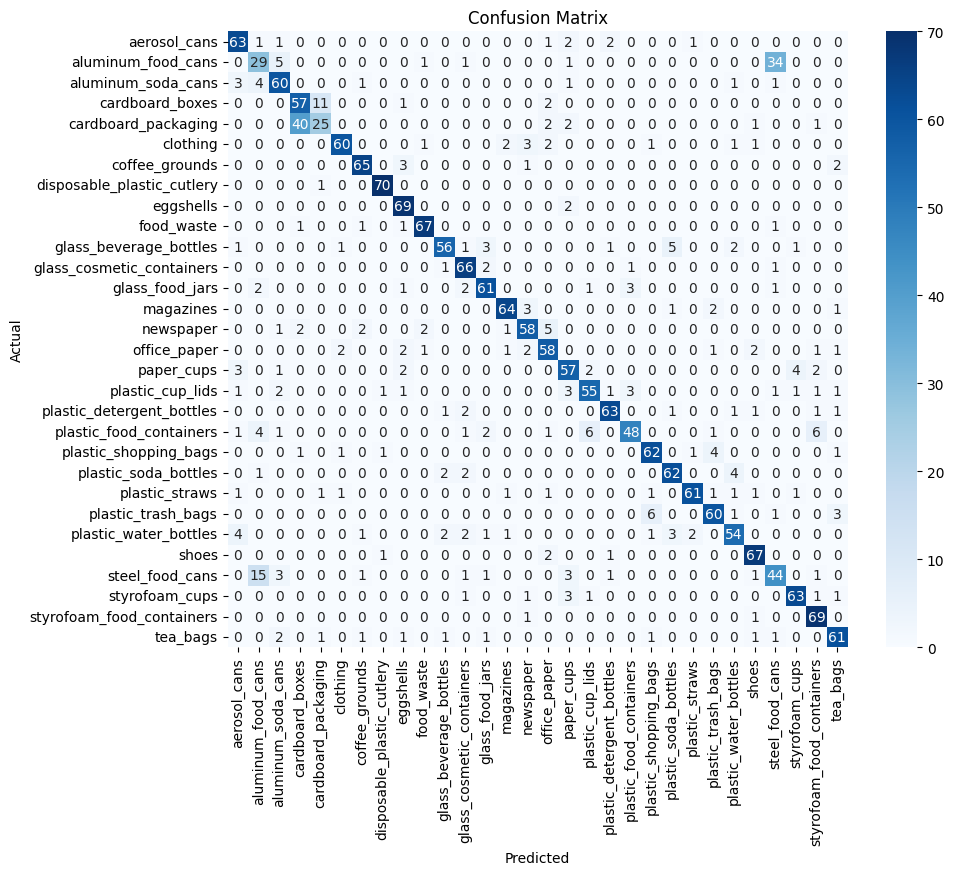

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


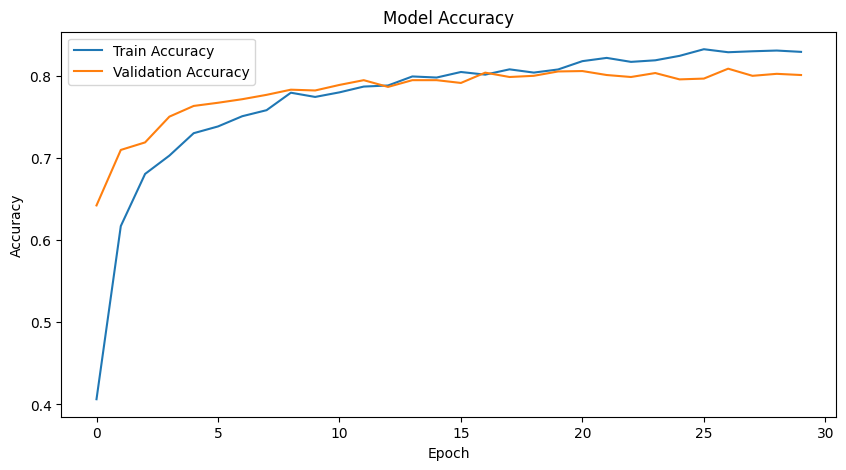

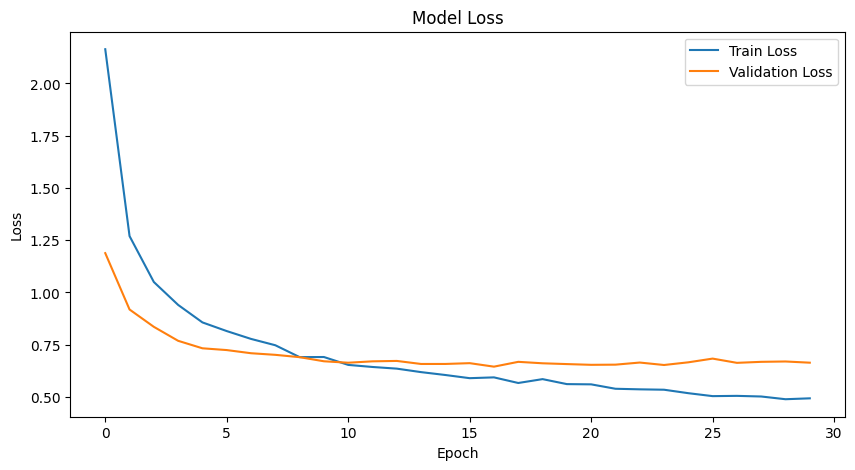

In [ ]:
# Plot akurasi
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


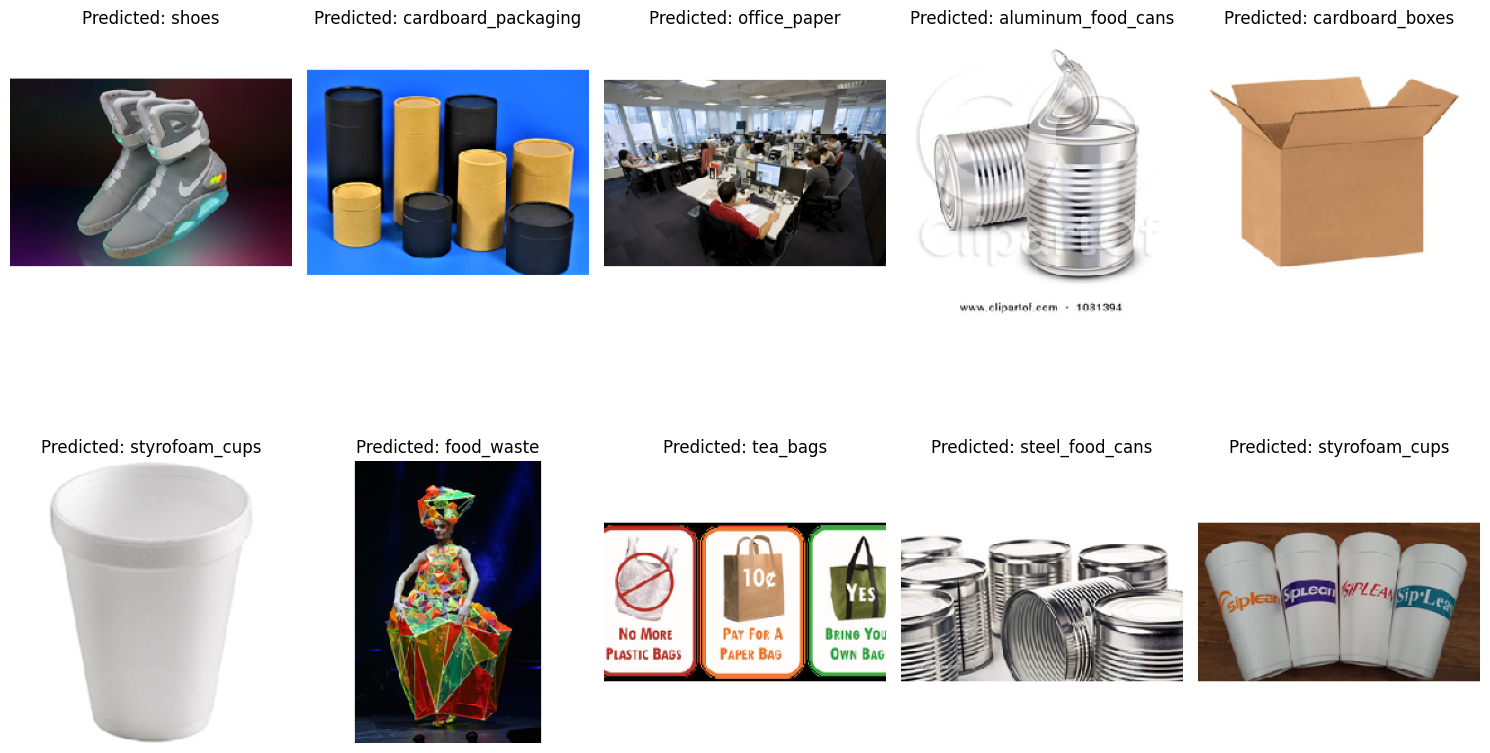

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


img_width, img_height = 224, 224
test_path = './data/split_dataset/test'

class_labels = list(test_generator.class_indices.keys())
random_idx = random.sample(range(len(test_generator.filenames)), 10)


plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idx):
    plt.subplot(2, 5, i + 1)


    img_path = os.path.join(test_path, test_generator.filenames[idx])
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    prediction = model.predict(np.expand_dims(img_array, axis=0))
    predicted_label = class_labels[np.argmax(prediction)]
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Simpan model sebagai file .h5
model.save('mobilenet_model.h5')
print("Model berhasil disimpan sebagai mobilenet_model.h5.")


In [ ]:
from google.colab import files

# Download file model .h5
files.download('mobilenet_model.h5')
print("Model sedang didownload...")
